# Importing the Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

In [2]:
!pip install yellowbrick


   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   ------------------------ --------------- 174.1/282.6 kB 5.3 MB/s eta 0:00:01
   ------------------------------------ --- 256.0/282.6 kB 3.2 MB/s eta 0:00:01
   ---------------------------------------- 282.6/282.6 kB 2.5 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
df = pd.read_csv('customer_segemtation.csv')
df

,Unnamed: 0,RENTROLLDATE,FACILITYID,UNITNUMBER,UNITREFLECTIONS,UNITSERENADE,UNITINDEPENDENT,UNITCLASS,PERSONID,RESIDENTID,...,MEDADMINRATEPERIOD,RATECODE,OCCUPANCYTYPE,PAYOR,ROOMBOARDRATE,SERVICELEVELRATE,MEDADMINRATE,ROOMBOARDMARKETRATE,SERVICELEVELMARKETRATE,MEDADMINMARKETRATE
0,0,04-01-2023,71,201,n,n,n,Studio Deluxe,272906.0,21867.0,...,daily,A,individual,Private,210.0,0.0,0.0,265.0,103,46
1,1,04-01-2023,71,202,n,n,n,Studio Deluxe,286942.0,22840.0,...,daily,A,individual,Private,339.0,40.0,39.0,265.0,40,39
2,2,04-01-2023,71,204,n,n,n,Studio,293978.0,23195.0,...,daily,TC,individual,Private,225.0,0.0,0.0,240.0,55,39
3,3,04-01-2023,71,205,n,n,n,Studio,237734.0,19752.0,...,daily,A,individual,Private,239.0,55.0,46.0,240.0,55,46
4,4,04-01-2023,71,206,n,n,n,Studio,252727.0,21744.0,...,daily,A,individual,Private,236.0,0.0,0.0,240.0,110,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492361,492361,22-03-2023,39,131,y,n,n,Studio,270584.0,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,278.0,0,0
492362,492362,22-03-2023,39,134,y,n,n,Studio,266941.0,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,278.0,0,0
492363,492363,22-03-2023,39,230,n,n,n,Two Bed Room,237991.0,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,258.0,0,0
492364,492364,22-03-2023,39,408,n,n,n,Two Bed Room,282193.0,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,258.0,0,0


In [5]:
df.columns

Index(['Unnamed: 0', 'RENTROLLDATE', 'FACILITYID', 'UNITNUMBER',
       'UNITREFLECTIONS', 'UNITSERENADE', 'UNITINDEPENDENT', 'UNITCLASS',
       'PERSONID', 'RESIDENTID', 'ADMISSIONDATE', 'DISCHARGEDATE',
       'DISCHARGED', 'SHORTTERMSTAY', 'ONHOLD', 'ONHOLDREASON',
       'ROOMBOARDRATEPERIOD', 'SERVICELEVELRATEPERIOD', 'MEDADMINRATEPERIOD',
       'RATECODE', 'OCCUPANCYTYPE', 'PAYOR', 'ROOMBOARDRATE',
       'SERVICELEVELRATE', 'MEDADMINRATE', 'ROOMBOARDMARKETRATE',
       'SERVICELEVELMARKETRATE', 'MEDADMINMARKETRATE'],
      dtype='object')

# Data Cleaning and Preprocessing

In [6]:
df = df.drop('Unnamed: 0', axis = 1)
df

,RENTROLLDATE,FACILITYID,UNITNUMBER,UNITREFLECTIONS,UNITSERENADE,UNITINDEPENDENT,UNITCLASS,PERSONID,RESIDENTID,ADMISSIONDATE,...,MEDADMINRATEPERIOD,RATECODE,OCCUPANCYTYPE,PAYOR,ROOMBOARDRATE,SERVICELEVELRATE,MEDADMINRATE,ROOMBOARDMARKETRATE,SERVICELEVELMARKETRATE,MEDADMINMARKETRATE
0,04-01-2023,71,201,n,n,n,Studio Deluxe,272906.0,21867.0,04-11-2021,...,daily,A,individual,Private,210.0,0.0,0.0,265.0,103,46
1,04-01-2023,71,202,n,n,n,Studio Deluxe,286942.0,22840.0,17-06-2022,...,daily,A,individual,Private,339.0,40.0,39.0,265.0,40,39
2,04-01-2023,71,204,n,n,n,Studio,293978.0,23195.0,31-08-2022,...,daily,TC,individual,Private,225.0,0.0,0.0,240.0,55,39
3,04-01-2023,71,205,n,n,n,Studio,237734.0,19752.0,17-09-2019,...,daily,A,individual,Private,239.0,55.0,46.0,240.0,55,46
4,04-01-2023,71,206,n,n,n,Studio,252727.0,21744.0,01-10-2021,...,daily,A,individual,Private,236.0,0.0,0.0,240.0,110,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492361,22-03-2023,39,131,y,n,n,Studio,270584.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,278.0,0,0
492362,22-03-2023,39,134,y,n,n,Studio,266941.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,278.0,0,0
492363,22-03-2023,39,230,n,n,n,Two Bed Room,237991.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,258.0,0,0
492364,22-03-2023,39,408,n,n,n,Two Bed Room,282193.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,258.0,0,0


In [7]:
df.isna().sum()

RENTROLLDATE                   0
FACILITYID                     0
UNITNUMBER                     0
UNITREFLECTIONS                0
UNITSERENADE                   0
UNITINDEPENDENT                0
UNITCLASS                      0
PERSONID                  109119
RESIDENTID                111536
ADMISSIONDATE             111536
DISCHARGEDATE             468530
DISCHARGED                111536
SHORTTERMSTAY               2417
ONHOLD                    111536
ONHOLDREASON              113060
ROOMBOARDRATEPERIOD       111536
SERVICELEVELRATEPERIOD    111536
MEDADMINRATEPERIOD        111536
RATECODE                  111536
OCCUPANCYTYPE             111536
PAYOR                     111536
ROOMBOARDRATE                  0
SERVICELEVELRATE               0
MEDADMINRATE                   0
ROOMBOARDMARKETRATE          575
SERVICELEVELMARKETRATE         0
MEDADMINMARKETRATE             0
dtype: int64

In [8]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
492361    False
492362    False
492363    False
492364    False
492365    False
Length: 492366, dtype: bool

In [9]:
df1 = df.copy()
df1

,RENTROLLDATE,FACILITYID,UNITNUMBER,UNITREFLECTIONS,UNITSERENADE,UNITINDEPENDENT,UNITCLASS,PERSONID,RESIDENTID,ADMISSIONDATE,...,MEDADMINRATEPERIOD,RATECODE,OCCUPANCYTYPE,PAYOR,ROOMBOARDRATE,SERVICELEVELRATE,MEDADMINRATE,ROOMBOARDMARKETRATE,SERVICELEVELMARKETRATE,MEDADMINMARKETRATE
0,04-01-2023,71,201,n,n,n,Studio Deluxe,272906.0,21867.0,04-11-2021,...,daily,A,individual,Private,210.0,0.0,0.0,265.0,103,46
1,04-01-2023,71,202,n,n,n,Studio Deluxe,286942.0,22840.0,17-06-2022,...,daily,A,individual,Private,339.0,40.0,39.0,265.0,40,39
2,04-01-2023,71,204,n,n,n,Studio,293978.0,23195.0,31-08-2022,...,daily,TC,individual,Private,225.0,0.0,0.0,240.0,55,39
3,04-01-2023,71,205,n,n,n,Studio,237734.0,19752.0,17-09-2019,...,daily,A,individual,Private,239.0,55.0,46.0,240.0,55,46
4,04-01-2023,71,206,n,n,n,Studio,252727.0,21744.0,01-10-2021,...,daily,A,individual,Private,236.0,0.0,0.0,240.0,110,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492361,22-03-2023,39,131,y,n,n,Studio,270584.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,278.0,0,0
492362,22-03-2023,39,134,y,n,n,Studio,266941.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,278.0,0,0
492363,22-03-2023,39,230,n,n,n,Two Bed Room,237991.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,258.0,0,0
492364,22-03-2023,39,408,n,n,n,Two Bed Room,282193.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,258.0,0,0


In [10]:
df.FACILITYID.value_counts()

FACILITYID
40    28834
39    24438
70    20332
15    20110
2     19984
69    19616
64    19483
11    19408
42    18764
43    18607
71    18497
67    17107
62    16881
44    16871
61    16665
68    16222
41    16093
66    16057
37    15260
1     14685
76    14186
75    13956
10    13896
60    13804
13    12553
36    11971
38    11870
45     9049
63     8893
31     8274
Name: count, dtype: int64

In [11]:
df.duplicated().value_counts()

False    492366
Name: count, dtype: int64

In [12]:
#PERSONID Column is dropped from here
df.drop('PERSONID',axis = 1, inplace = True)
df.isna().sum()

RENTROLLDATE                   0
FACILITYID                     0
UNITNUMBER                     0
UNITREFLECTIONS                0
UNITSERENADE                   0
UNITINDEPENDENT                0
UNITCLASS                      0
RESIDENTID                111536
ADMISSIONDATE             111536
DISCHARGEDATE             468530
DISCHARGED                111536
SHORTTERMSTAY               2417
ONHOLD                    111536
ONHOLDREASON              113060
ROOMBOARDRATEPERIOD       111536
SERVICELEVELRATEPERIOD    111536
MEDADMINRATEPERIOD        111536
RATECODE                  111536
OCCUPANCYTYPE             111536
PAYOR                     111536
ROOMBOARDRATE                  0
SERVICELEVELRATE               0
MEDADMINRATE                   0
ROOMBOARDMARKETRATE          575
SERVICELEVELMARKETRATE         0
MEDADMINMARKETRATE             0
dtype: int64

In [13]:
df.SHORTTERMSTAY.value_counts()

SHORTTERMSTAY
no         486864
respite      3085
Name: count, dtype: int64

In [14]:
df.RESIDENTID.value_counts()

RESIDENTID
22519.0    165
21223.0    165
22874.0    165
22941.0    165
21105.0    165
          ... 
24159.0      1
23755.0      1
23794.0      1
18875.0      1
23742.0      1
Name: count, Length: 2878, dtype: int64

In [15]:
#dataframe for customer
df_cust = df[['RENTROLLDATE','RESIDENTID','ADMISSIONDATE','DISCHARGEDATE','DISCHARGED','ROOMBOARDRATEPERIOD','SERVICELEVELRATEPERIOD','MEDADMINRATEPERIOD','PAYOR']].copy()
df_cust


,RENTROLLDATE,RESIDENTID,ADMISSIONDATE,DISCHARGEDATE,DISCHARGED,ROOMBOARDRATEPERIOD,SERVICELEVELRATEPERIOD,MEDADMINRATEPERIOD,PAYOR
0,04-01-2023,21867.0,04-11-2021,NaN,n,daily,daily,daily,Private
1,04-01-2023,22840.0,17-06-2022,NaN,n,daily,daily,daily,Private
2,04-01-2023,23195.0,31-08-2022,NaN,n,daily,daily,daily,Private
3,04-01-2023,19752.0,17-09-2019,NaN,n,daily,daily,daily,Private
4,04-01-2023,21744.0,01-10-2021,NaN,n,daily,daily,daily,Private
...,...,...,...,...,...,...,...,...,...
492361,22-03-2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
492362,22-03-2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
492363,22-03-2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
492364,22-03-2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df_cust.isna().sum()

RENTROLLDATE                   0
RESIDENTID                111536
ADMISSIONDATE             111536
DISCHARGEDATE             468530
DISCHARGED                111536
ROOMBOARDRATEPERIOD       111536
SERVICELEVELRATEPERIOD    111536
MEDADMINRATEPERIOD        111536
PAYOR                     111536
dtype: int64

In [17]:
df_cust.dropna(subset= ['RESIDENTID'], inplace= True)

In [18]:
df_cust['DISCHARGEDATE'] = df_cust['DISCHARGEDATE'].replace(np.NaN, pd.NaT)

In [19]:
df_cust


,RENTROLLDATE,RESIDENTID,ADMISSIONDATE,DISCHARGEDATE,DISCHARGED,ROOMBOARDRATEPERIOD,SERVICELEVELRATEPERIOD,MEDADMINRATEPERIOD,PAYOR
0,04-01-2023,21867.0,04-11-2021,NaN,n,daily,daily,daily,Private
1,04-01-2023,22840.0,17-06-2022,NaN,n,daily,daily,daily,Private
2,04-01-2023,23195.0,31-08-2022,NaN,n,daily,daily,daily,Private
3,04-01-2023,19752.0,17-09-2019,NaN,n,daily,daily,daily,Private
4,04-01-2023,21744.0,01-10-2021,NaN,n,daily,daily,daily,Private
...,...,...,...,...,...,...,...,...,...
492341,22-03-2023,15178.0,11-03-2016,NaN,n,daily,daily,daily,Private
492342,22-03-2023,20556.0,26-09-2020,NaN,n,daily,daily,daily,Private
492343,22-03-2023,21953.0,05-11-2021,NaN,n,daily,daily,daily,Private
492344,22-03-2023,15853.0,12-11-2016,NaN,n,daily,daily,daily,Private


Segmentation On customer dataframe

In [21]:
# df_cust['RENTROLLDATE'] = pd.to_datetime(df_cust['RENTROLLDATE'])
# df_cust['ADMISSIONDATE'] = pd.to_datetime(df_cust['ADMISSIONDATE'])

# latest_rentroll_dates = df_cust.groupby('RESIDENTID')['RENTROLLDATE'].max()
# admission_dates = df_cust.groupby('RESIDENTID')['ADMISSIONDATE'].max()

# latest_rentroll_df = pd.DataFrame({'RESIDENTID': latest_rentroll_dates.index, 'LATEST_RENTROLLDATE': latest_rentroll_dates.values, 'ADMISSION DATE': admission_dates.values})
# latest_rentroll_df
# Convert to datetime, setting invalid parsing to NaT
df_cust['RENTROLLDATE'] = pd.to_datetime(df_cust['RENTROLLDATE'], errors='coerce')
df_cust['ADMISSIONDATE'] = pd.to_datetime(df_cust['ADMISSIONDATE'], errors='coerce')

df_cust.dropna(subset=['RENTROLLDATE', 'ADMISSIONDATE'], inplace=True)

latest_rentroll_dates = df_cust.groupby('RESIDENTID')['RENTROLLDATE'].max()
admission_dates = df_cust.groupby('RESIDENTID')['ADMISSIONDATE'].max()


latest_rentroll_df = pd.DataFrame({
    'RESIDENTID': latest_rentroll_dates.index,
    'LATEST_RENTROLLDATE': latest_rentroll_dates.values,
    'ADMISSIONDATE': admission_dates.values
})

latest_rentroll_df


,RESIDENTID,LATEST_RENTROLLDATE,ADMISSIONDATE
0,2774.0,2023-12-02,2002-01-11
1,3446.0,2023-12-06,2007-10-03
2,3615.0,2023-12-06,2008-11-01
3,4968.0,2023-12-06,2009-08-03
4,5277.0,2023-12-06,2009-02-04
...,...,...,...
1052,24243.0,2023-12-06,2023-08-06
1053,24256.0,2023-12-06,2023-09-06
1054,24260.0,2023-12-06,2023-09-06
1055,24264.0,2023-12-06,2023-09-06


In [23]:
latest_rentroll_df['STAY_DURATION'] = latest_rentroll_df['LATEST_RENTROLLDATE'] - latest_rentroll_df['ADMISSIONDATE']

latest_rentroll_df['STAY_DURATION'] = latest_rentroll_df['STAY_DURATION'].dt.days

latest_rentroll_df

,RESIDENTID,LATEST_RENTROLLDATE,ADMISSIONDATE,STAY_DURATION
0,2774.0,2023-12-02,2002-01-11,7995
1,3446.0,2023-12-06,2007-10-03,5908
2,3615.0,2023-12-06,2008-11-01,5513
3,4968.0,2023-12-06,2009-08-03,5238
4,5277.0,2023-12-06,2009-02-04,5418
...,...,...,...,...
1052,24243.0,2023-12-06,2023-08-06,122
1053,24256.0,2023-12-06,2023-09-06,91
1054,24260.0,2023-12-06,2023-09-06,91
1055,24264.0,2023-12-06,2023-09-06,91


In [24]:
daily_rows = df_cust[(df_cust['ROOMBOARDRATEPERIOD'] == 'daily') & (df_cust['SERVICELEVELRATEPERIOD'] == 'daily') & (df_cust['MEDADMINRATEPERIOD']== 'daily')]
daily_rows

,RENTROLLDATE,RESIDENTID,ADMISSIONDATE,DISCHARGEDATE,DISCHARGED,ROOMBOARDRATEPERIOD,SERVICELEVELRATEPERIOD,MEDADMINRATEPERIOD,PAYOR
0,2023-04-01,21867.0,2021-04-11,NaN,n,daily,daily,daily,Private
4,2023-04-01,21744.0,2021-01-10,NaN,n,daily,daily,daily,Private
5,2023-04-01,21575.0,2021-02-08,NaN,n,daily,daily,daily,Private
6,2023-04-01,20761.0,2021-09-08,NaN,n,daily,daily,daily,Private
7,2023-04-01,22087.0,2021-04-12,NaN,n,daily,daily,daily,Private
...,...,...,...,...,...,...,...,...,...
462537,2023-12-03,22382.0,2022-01-04,NaN,n,daily,daily,daily,Private
462538,2023-12-03,13873.0,2015-01-06,NaN,n,daily,daily,daily,Private
462540,2023-12-03,15178.0,2016-11-03,NaN,n,daily,daily,daily,Private
462542,2023-12-03,21953.0,2021-05-11,NaN,n,daily,daily,daily,Private


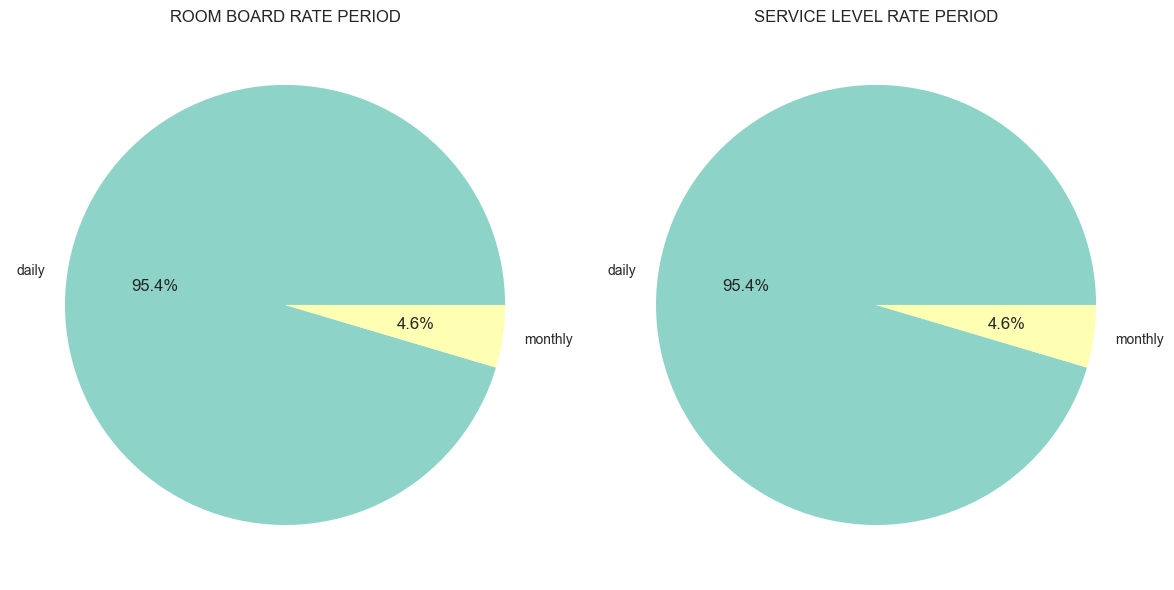

In [25]:
fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize = (12,6))
axes[0].pie(df_cust['ROOMBOARDRATEPERIOD'].value_counts(),labels =  df_cust['ROOMBOARDRATEPERIOD'].value_counts().index, autopct = '%1.1f%%', colors = sns.color_palette('Set3'))
axes[0].set_title('ROOM BOARD RATE PERIOD')

axes[1].pie(df_cust['SERVICELEVELRATEPERIOD'].value_counts(),labels = df_cust['SERVICELEVELRATEPERIOD'].value_counts().index, autopct = '%1.1f%%',  colors = sns.color_palette('Set3'))
axes[1].set_title('SERVICE LEVEL RATE PERIOD')

plt.tight_layout()

plt.show()

In [26]:
df_cust['PAYOR'].value_counts()

PAYOR
Private     52194
Medicaid     8119
PAL           168
Name: count, dtype: int64

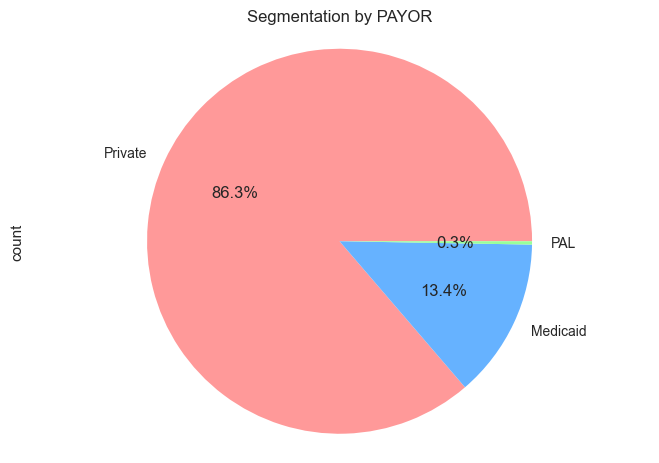

In [27]:
payor_seg = df_cust['PAYOR'].value_counts()

payor_seg.plot(kind = 'pie', autopct = '%1.1f%%', colors = ['#FF9999', '#66B2FF', '#99FF99'])
plt.axis('equal')
plt.title('Segmentation by PAYOR')
plt.show()

In [28]:
df_cust['DISCHARGED'].value_counts()

DISCHARGED
n    59078
y     1403
Name: count, dtype: int64

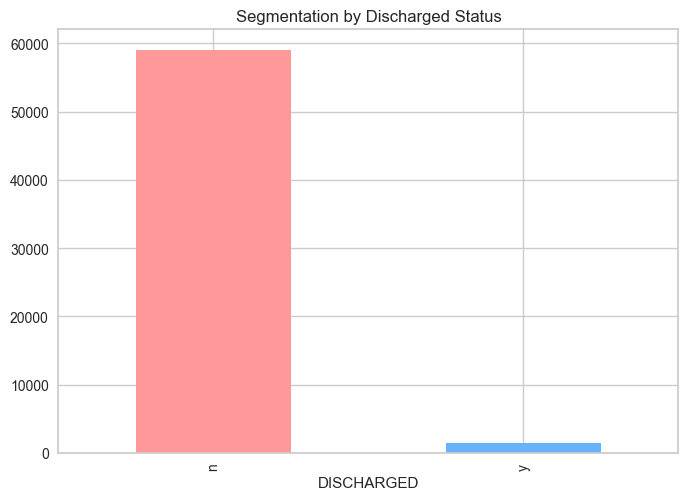

In [29]:
discharged_seg = df_cust.groupby('DISCHARGED').size()

discharged_seg.plot(kind = 'bar', color=['#FF9999', '#66B2FF'])
plt.title('Segmentation by Discharged Status')
plt.show()

Segmentation on Unit Dataframe

In [30]:
#dataframe for unit
df_unit = df.filter(['RENTROLLDATE','FACILITYID','UNITNUMBER','UNITREFLECTIONS','UNITSERENADE','UNITINDEPENDENT','UNITCLASS','RESIDENTID','SHORTTERMSTAY','ONHOLD','ONHOLDREASON','ROOMBOARDRATE','SERVICELEVELRATE','MEDADMINRATE','ROOMBOARDMARKETRATE','SERVICELEVELMARKETRATE','MEDADMINMARKETRATE', 'OCCUPANCYTYPE'], axis = 1)
df_unit

,RENTROLLDATE,FACILITYID,UNITNUMBER,UNITREFLECTIONS,UNITSERENADE,UNITINDEPENDENT,UNITCLASS,RESIDENTID,SHORTTERMSTAY,ONHOLD,ONHOLDREASON,ROOMBOARDRATE,SERVICELEVELRATE,MEDADMINRATE,ROOMBOARDMARKETRATE,SERVICELEVELMARKETRATE,MEDADMINMARKETRATE,OCCUPANCYTYPE
0,04-01-2023,71,201,n,n,n,Studio Deluxe,21867.0,no,n,no,210.0,0.0,0.0,265.0,103,46,individual
1,04-01-2023,71,202,n,n,n,Studio Deluxe,22840.0,no,n,no,339.0,40.0,39.0,265.0,40,39,individual
2,04-01-2023,71,204,n,n,n,Studio,23195.0,no,n,no,225.0,0.0,0.0,240.0,55,39,individual
3,04-01-2023,71,205,n,n,n,Studio,19752.0,no,n,no,239.0,55.0,46.0,240.0,55,46,individual
4,04-01-2023,71,206,n,n,n,Studio,21744.0,no,n,no,236.0,0.0,0.0,240.0,110,39,individual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492361,22-03-2023,39,131,y,n,n,Studio,NaN,NaN,NaN,NaN,0.0,0.0,0.0,278.0,0,0,NaN
492362,22-03-2023,39,134,y,n,n,Studio,NaN,NaN,NaN,NaN,0.0,0.0,0.0,278.0,0,0,NaN
492363,22-03-2023,39,230,n,n,n,Two Bed Room,NaN,NaN,NaN,NaN,0.0,0.0,0.0,258.0,0,0,NaN
492364,22-03-2023,39,408,n,n,n,Two Bed Room,NaN,NaN,NaN,NaN,0.0,0.0,0.0,258.0,0,0,NaN


In [31]:
df_unit.isna().sum()

RENTROLLDATE                   0
FACILITYID                     0
UNITNUMBER                     0
UNITREFLECTIONS                0
UNITSERENADE                   0
UNITINDEPENDENT                0
UNITCLASS                      0
RESIDENTID                111536
SHORTTERMSTAY               2417
ONHOLD                    111536
ONHOLDREASON              113060
ROOMBOARDRATE                  0
SERVICELEVELRATE               0
MEDADMINRATE                   0
ROOMBOARDMARKETRATE          575
SERVICELEVELMARKETRATE         0
MEDADMINMARKETRATE             0
OCCUPANCYTYPE             111536
dtype: int64

In [32]:
df_unit.dropna(subset= ['RESIDENTID'], inplace= True)

In [33]:
df_unit = df_unit.fillna({'ROOMBOARDMARKETRATE': df_unit['ROOMBOARDMARKETRATE'].median(),
                         'ONHOLDREASON': 'no'})

In [34]:
df_unit

,RENTROLLDATE,FACILITYID,UNITNUMBER,UNITREFLECTIONS,UNITSERENADE,UNITINDEPENDENT,UNITCLASS,RESIDENTID,SHORTTERMSTAY,ONHOLD,ONHOLDREASON,ROOMBOARDRATE,SERVICELEVELRATE,MEDADMINRATE,ROOMBOARDMARKETRATE,SERVICELEVELMARKETRATE,MEDADMINMARKETRATE,OCCUPANCYTYPE
0,04-01-2023,71,201,n,n,n,Studio Deluxe,21867.0,no,n,no,210.0,0.0,0.0,265.0,103,46,individual
1,04-01-2023,71,202,n,n,n,Studio Deluxe,22840.0,no,n,no,339.0,40.0,39.0,265.0,40,39,individual
2,04-01-2023,71,204,n,n,n,Studio,23195.0,no,n,no,225.0,0.0,0.0,240.0,55,39,individual
3,04-01-2023,71,205,n,n,n,Studio,19752.0,no,n,no,239.0,55.0,46.0,240.0,55,46,individual
4,04-01-2023,71,206,n,n,n,Studio,21744.0,no,n,no,236.0,0.0,0.0,240.0,110,39,individual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492341,22-03-2023,60,5,y,y,n,Studio,15178.0,no,n,no,120.0,0.0,0.0,360.0,79,25,individual
492342,22-03-2023,60,6,y,y,n,Studio,20556.0,no,n,no,359.0,69.0,0.0,360.0,69,25,individual
492343,22-03-2023,60,7,y,y,n,Studio Deluxe,21953.0,no,n,no,332.0,69.0,32.0,384.0,79,32,individual
492344,22-03-2023,60,8,y,y,n,Studio,15853.0,no,n,no,308.0,69.0,0.0,360.0,69,0,individual


In [35]:
df_unit.isna().sum()

RENTROLLDATE              0
FACILITYID                0
UNITNUMBER                0
UNITREFLECTIONS           0
UNITSERENADE              0
UNITINDEPENDENT           0
UNITCLASS                 0
RESIDENTID                0
SHORTTERMSTAY             0
ONHOLD                    0
ONHOLDREASON              0
ROOMBOARDRATE             0
SERVICELEVELRATE          0
MEDADMINRATE              0
ROOMBOARDMARKETRATE       0
SERVICELEVELMARKETRATE    0
MEDADMINMARKETRATE        0
OCCUPANCYTYPE             0
dtype: int64

In [36]:
df_unit.dtypes

RENTROLLDATE               object
FACILITYID                  int64
UNITNUMBER                 object
UNITREFLECTIONS            object
UNITSERENADE               object
UNITINDEPENDENT            object
UNITCLASS                  object
RESIDENTID                float64
SHORTTERMSTAY              object
ONHOLD                     object
ONHOLDREASON               object
ROOMBOARDRATE             float64
SERVICELEVELRATE          float64
MEDADMINRATE              float64
ROOMBOARDMARKETRATE       float64
SERVICELEVELMARKETRATE      int64
MEDADMINMARKETRATE          int64
OCCUPANCYTYPE              object
dtype: object

In [38]:
df_unit['RENTROLLDATE'] = pd.to_datetime(df_unit['RENTROLLDATE'], format='mixed')

# Display the DataFrame
print(df_unit)

       RENTROLLDATE  FACILITYID UNITNUMBER UNITREFLECTIONS UNITSERENADE  \
0        2023-04-01          71        201               n            n   
1        2023-04-01          71        202               n            n   
2        2023-04-01          71        204               n            n   
3        2023-04-01          71        205               n            n   
4        2023-04-01          71        206               n            n   
...             ...         ...        ...             ...          ...   
492341   2023-03-22          60          5               y            y   
492342   2023-03-22          60          6               y            y   
492343   2023-03-22          60          7               y            y   
492344   2023-03-22          60          8               y            y   
492345   2023-03-22          60          9               y            y   

       UNITINDEPENDENT      UNITCLASS  RESIDENTID SHORTTERMSTAY ONHOLD  \
0                    n  S

In [39]:
cat_cols = df_unit.select_dtypes(include=['object','category']).columns.to_list()


In [40]:
#Label Encoding of Unit df

le = LabelEncoder()

for i in cat_cols:
    df_unit[i] = df_unit[[i]].apply(le.fit_transform)
    
df_unit

,RENTROLLDATE,FACILITYID,UNITNUMBER,UNITREFLECTIONS,UNITSERENADE,UNITINDEPENDENT,UNITCLASS,RESIDENTID,SHORTTERMSTAY,ONHOLD,ONHOLDREASON,ROOMBOARDRATE,SERVICELEVELRATE,MEDADMINRATE,ROOMBOARDMARKETRATE,SERVICELEVELMARKETRATE,MEDADMINMARKETRATE,OCCUPANCYTYPE
0,2023-04-01,71,83,0,0,0,2,21867.0,0,0,1,210.0,0.0,0.0,265.0,103,46,1
1,2023-04-01,71,84,0,0,0,2,22840.0,0,0,1,339.0,40.0,39.0,265.0,40,39,1
2,2023-04-01,71,86,0,0,0,1,23195.0,0,0,1,225.0,0.0,0.0,240.0,55,39,1
3,2023-04-01,71,87,0,0,0,1,19752.0,0,0,1,239.0,55.0,46.0,240.0,55,46,1
4,2023-04-01,71,88,0,0,0,1,21744.0,0,0,1,236.0,0.0,0.0,240.0,110,39,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492341,2023-03-22,60,251,1,1,0,1,15178.0,0,0,1,120.0,0.0,0.0,360.0,79,25,1
492342,2023-03-22,60,281,1,1,0,1,20556.0,0,0,1,359.0,69.0,0.0,360.0,69,25,1
492343,2023-03-22,60,300,1,1,0,2,21953.0,0,0,1,332.0,69.0,32.0,384.0,79,32,1
492344,2023-03-22,60,301,1,1,0,1,15853.0,0,0,1,308.0,69.0,0.0,360.0,69,0,1


In [41]:
#checking the outliers

num_cols = df_unit.select_dtypes(include= [np.number]).columns
num_cols

Index(['FACILITYID', 'UNITNUMBER', 'UNITREFLECTIONS', 'UNITSERENADE',
       'UNITINDEPENDENT', 'UNITCLASS', 'RESIDENTID', 'SHORTTERMSTAY', 'ONHOLD',
       'ONHOLDREASON', 'ROOMBOARDRATE', 'SERVICELEVELRATE', 'MEDADMINRATE',
       'ROOMBOARDMARKETRATE', 'SERVICELEVELMARKETRATE', 'MEDADMINMARKETRATE',
       'OCCUPANCYTYPE'],
      dtype='object')

In [42]:
#Scaling in unit dataframe on numerical columns
from sklearn.preprocessing import StandardScaler

columns_to_scale = ['ROOMBOARDRATE', 'SERVICELEVELRATE', 'MEDADMINRATE', 'ROOMBOARDMARKETRATE', 'SERVICELEVELMARKETRATE', 'MEDADMINMARKETRATE']

scaler = StandardScaler()

df_unit[columns_to_scale] = scaler.fit_transform(df_unit[columns_to_scale])

In [43]:
df_unit

,RENTROLLDATE,FACILITYID,UNITNUMBER,UNITREFLECTIONS,UNITSERENADE,UNITINDEPENDENT,UNITCLASS,RESIDENTID,SHORTTERMSTAY,ONHOLD,ONHOLDREASON,ROOMBOARDRATE,SERVICELEVELRATE,MEDADMINRATE,ROOMBOARDMARKETRATE,SERVICELEVELMARKETRATE,MEDADMINMARKETRATE,OCCUPANCYTYPE
0,2023-04-01,71,83,0,0,0,2,21867.0,0,0,1,-0.238600,-0.254190,-0.237322,-0.172222,1.416542,1.205916,1
1,2023-04-01,71,84,0,0,0,2,22840.0,0,0,1,-0.145876,-0.099849,0.032482,-0.172222,-0.324265,0.754819,1
2,2023-04-01,71,86,0,0,0,1,23195.0,0,0,1,-0.227818,-0.254190,-0.237322,-0.441739,0.090213,0.754819,1
3,2023-04-01,71,87,0,0,0,1,19752.0,0,0,1,-0.217755,-0.041971,0.080908,-0.441739,0.090213,1.205916,1
4,2023-04-01,71,88,0,0,0,1,21744.0,0,0,1,-0.219912,-0.254190,-0.237322,-0.441739,1.609965,0.754819,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492341,2023-03-22,60,251,1,1,0,1,15178.0,0,0,1,-0.303291,-0.254190,-0.237322,0.851943,0.753378,-0.147376,1
492342,2023-03-22,60,281,1,1,0,1,20556.0,0,0,1,-0.131500,0.012048,-0.237322,0.851943,0.477059,-0.147376,1
492343,2023-03-22,60,300,1,1,0,2,21953.0,0,0,1,-0.150908,0.012048,-0.015944,1.110679,0.753378,0.303722,1
492344,2023-03-22,60,301,1,1,0,1,15853.0,0,0,1,-0.168159,0.012048,-0.237322,0.851943,0.477059,-1.758437,1


In [44]:
df_unit.columns

Index(['RENTROLLDATE', 'FACILITYID', 'UNITNUMBER', 'UNITREFLECTIONS',
       'UNITSERENADE', 'UNITINDEPENDENT', 'UNITCLASS', 'RESIDENTID',
       'SHORTTERMSTAY', 'ONHOLD', 'ONHOLDREASON', 'ROOMBOARDRATE',
       'SERVICELEVELRATE', 'MEDADMINRATE', 'ROOMBOARDMARKETRATE',
       'SERVICELEVELMARKETRATE', 'MEDADMINMARKETRATE', 'OCCUPANCYTYPE'],
      dtype='object')

In [45]:
grouped_data = df_unit.groupby(['FACILITYID', 'UNITNUMBER'])['RESIDENTID'].unique()
   
grouped_data = grouped_data.apply(lambda x: x.tolist())
df_unit1 = pd.DataFrame({'FACILITYID': grouped_data.index.get_level_values(0),
                       'UNITNUMBER': grouped_data.index.get_level_values(1),
                       'RESIDENTID': grouped_data.values})
df_unit1

,FACILITYID,UNITNUMBER,RESIDENTID
0,1,0,[22732.0]
1,1,1,[20953.0]
2,1,2,[19474.0]
3,1,3,[21138.0]
4,1,4,"[21032.0, 6986.0]"
...,...,...,...
2558,76,193,[20646.0]
2559,76,194,[23737.0]
2560,76,195,[23817.0]
2561,76,196,[22881.0]


In [46]:
new_df = df_unit.groupby('UNITCLASS')['RESIDENTID'].size().reset_index(name='ResidentCount')
new_df

,UNITCLASS,ResidentCount
0,0,109568
1,1,186080
2,2,59015
3,3,26167


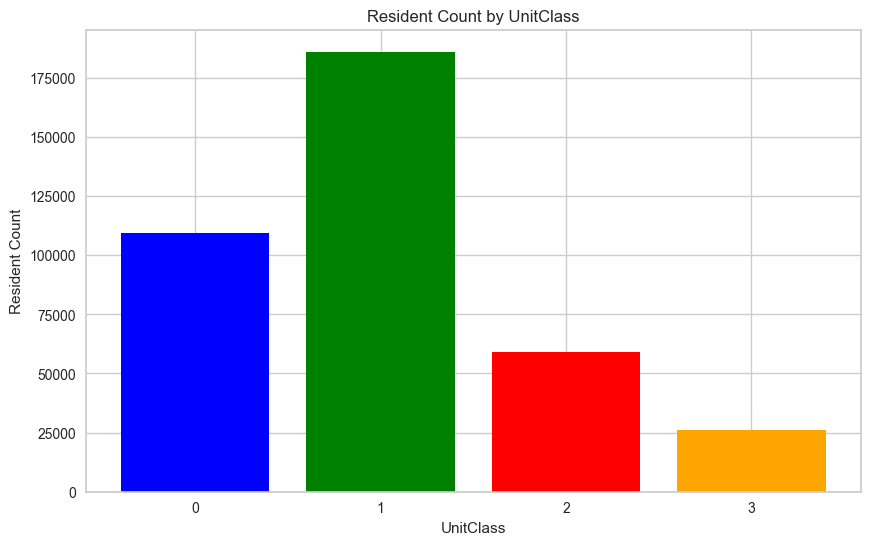

In [47]:
colors = ['blue', 'green', 'red', 'orange', 'purple']
plt.figure(figsize=(10, 6))
plt.bar(new_df['UNITCLASS'], new_df['ResidentCount'], color = colors)
plt.xlabel('UnitClass')
plt.ylabel('Resident Count')
plt.title('Resident Count by UnitClass')
plt.xticks(range(len(new_df['UNITCLASS'])), new_df['UNITCLASS'])
plt.show()

In [48]:
#Kmeans clustering before PCA


cols = ['FACILITYID', 'ROOMBOARDRATE', 'SERVICELEVELRATE', 'MEDADMINRATE', 'ROOMBOARDMARKETRATE','SERVICELEVELMARKETRATE', 'MEDADMINMARKETRATE']

subset = df_unit[cols].copy()

kmeans = KMeans(n_clusters= 3, random_state= 42)
subset['Cluster'] = kmeans.fit_predict(subset)


cluster_df = pd.concat([df_unit['RESIDENTID'], subset], axis=1)


cluster_df

c:\Users\Anshika\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,RESIDENTID,FACILITYID,ROOMBOARDRATE,SERVICELEVELRATE,MEDADMINRATE,ROOMBOARDMARKETRATE,SERVICELEVELMARKETRATE,MEDADMINMARKETRATE,Cluster
0,21867.0,71,-0.238600,-0.254190,-0.237322,-0.172222,1.416542,1.205916,0
1,22840.0,71,-0.145876,-0.099849,0.032482,-0.172222,-0.324265,0.754819,0
2,23195.0,71,-0.227818,-0.254190,-0.237322,-0.441739,0.090213,0.754819,0
3,19752.0,71,-0.217755,-0.041971,0.080908,-0.441739,0.090213,1.205916,0
4,21744.0,71,-0.219912,-0.254190,-0.237322,-0.441739,1.609965,0.754819,0
...,...,...,...,...,...,...,...,...,...
492341,15178.0,60,-0.303291,-0.254190,-0.237322,0.851943,0.753378,-0.147376,0
492342,20556.0,60,-0.131500,0.012048,-0.237322,0.851943,0.477059,-0.147376,0
492343,21953.0,60,-0.150908,0.012048,-0.015944,1.110679,0.753378,0.303722,0
492344,15853.0,60,-0.168159,0.012048,-0.237322,0.851943,0.477059,-1.758437,0


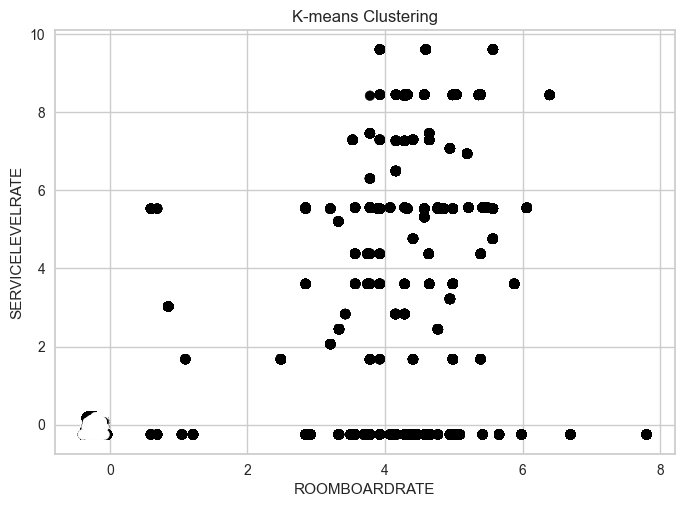

In [49]:
plt.scatter(cluster_df['ROOMBOARDRATE'], cluster_df['SERVICELEVELRATE'], c=cluster_df['Cluster'])
plt.xlabel('ROOMBOARDRATE')
plt.ylabel('SERVICELEVELRATE')
plt.title('K-means Clustering')
plt.show()

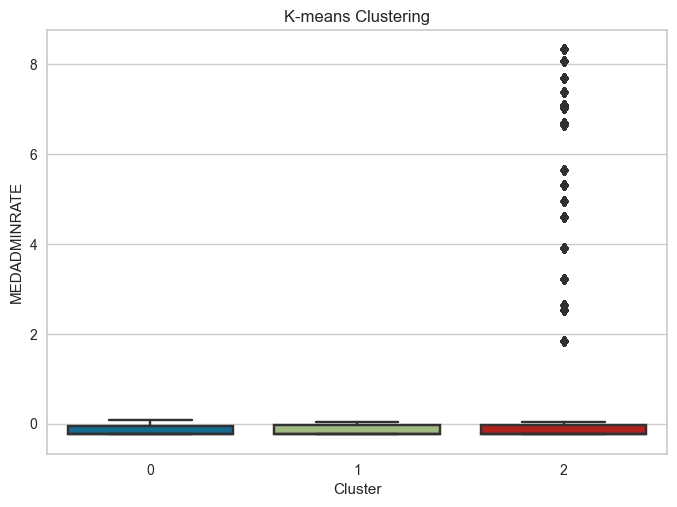

In [50]:
sns.boxplot(x=cluster_df['Cluster'], y=cluster_df['MEDADMINRATE'])
plt.xlabel('Cluster')
plt.ylabel('MEDADMINRATE')
plt.title('K-means Clustering')
plt.show()

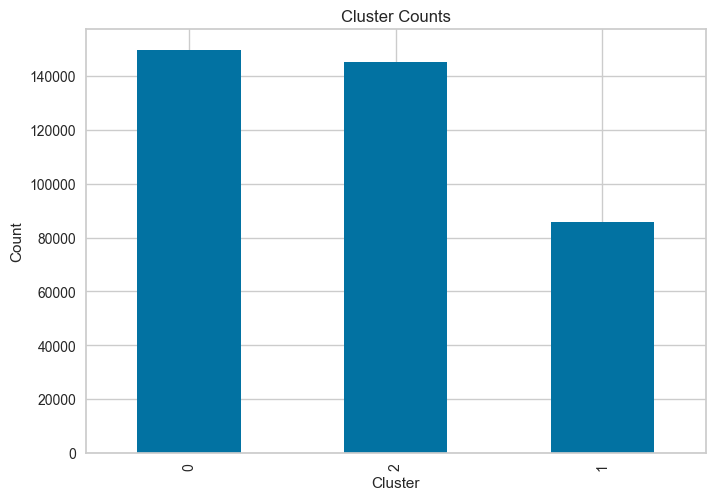

In [51]:
cluster_counts = cluster_df['Cluster'].value_counts()
cluster_counts.plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Cluster Counts')
plt.show()

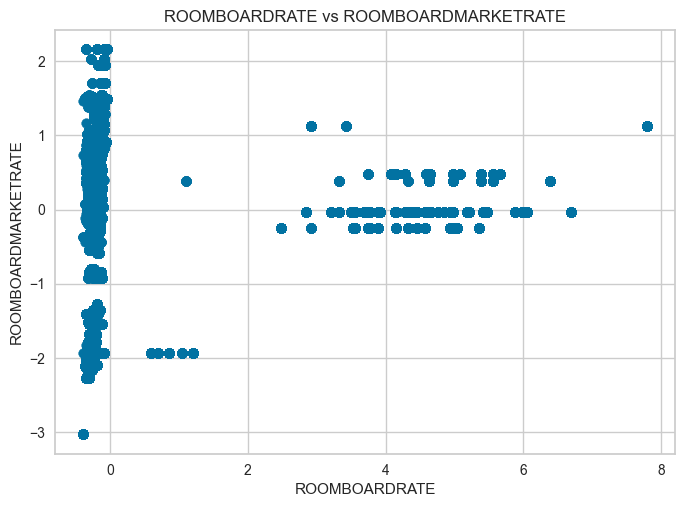

In [52]:
plt.scatter(cluster_df['ROOMBOARDRATE'], cluster_df['ROOMBOARDMARKETRATE'])
plt.xlabel('ROOMBOARDRATE')
plt.ylabel('ROOMBOARDMARKETRATE')
plt.title('ROOMBOARDRATE vs ROOMBOARDMARKETRATE')
plt.show()

In [53]:

cols = ['FACILITYID', 'UNITNUMBER', 'OCCUPANCYTYPE']

subset = df_unit[cols].copy()

kmeans = KMeans(n_clusters= 3, random_state= 42)
subset['Cluster'] = kmeans.fit_predict(subset)


cluster_df1 = pd.concat([df_unit['RESIDENTID'], subset], axis=1)


cluster_df1

c:\Users\Anshika\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,RESIDENTID,FACILITYID,UNITNUMBER,OCCUPANCYTYPE,Cluster
0,21867.0,71,83,1,1
1,22840.0,71,84,1,1
2,23195.0,71,86,1,1
3,19752.0,71,87,1,1
4,21744.0,71,88,1,1
...,...,...,...,...,...
492341,15178.0,60,251,1,0
492342,20556.0,60,281,1,0
492343,21953.0,60,300,1,2
492344,15853.0,60,301,1,2


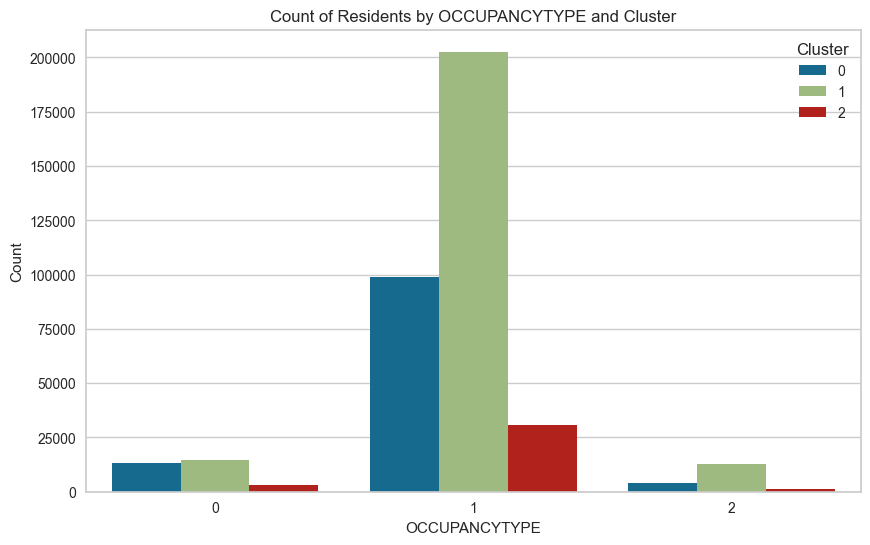

In [54]:
occupancy_counts = cluster_df1.groupby(['OCCUPANCYTYPE', 'Cluster'])['RESIDENTID'].count().reset_index()

# Plot the graph
plt.figure(figsize=(10, 6))
sns.barplot(x='OCCUPANCYTYPE', y='RESIDENTID', hue='Cluster', data=occupancy_counts)
plt.xlabel('OCCUPANCYTYPE')
plt.ylabel('Count')
plt.title('Count of Residents by OCCUPANCYTYPE and Cluster')
plt.show()

In [55]:
df_unit['UNITCOMBINED'] = df_unit.apply(lambda x: f"{x['UNITREFLECTIONS']}_{x['UNITSERENADE']}_{x['UNITINDEPENDENT']}", axis = 1)

In [56]:
df_unit = df_unit.drop(['UNITREFLECTIONS','UNITSERENADE','UNITINDEPENDENT'], axis = 1)
df_unit

,RENTROLLDATE,FACILITYID,UNITNUMBER,UNITCLASS,RESIDENTID,SHORTTERMSTAY,ONHOLD,ONHOLDREASON,ROOMBOARDRATE,SERVICELEVELRATE,MEDADMINRATE,ROOMBOARDMARKETRATE,SERVICELEVELMARKETRATE,MEDADMINMARKETRATE,OCCUPANCYTYPE,UNITCOMBINED
0,2023-04-01,71,83,2,21867.0,0,0,1,-0.238600,-0.254190,-0.237322,-0.172222,1.416542,1.205916,1,0_0_0
1,2023-04-01,71,84,2,22840.0,0,0,1,-0.145876,-0.099849,0.032482,-0.172222,-0.324265,0.754819,1,0_0_0
2,2023-04-01,71,86,1,23195.0,0,0,1,-0.227818,-0.254190,-0.237322,-0.441739,0.090213,0.754819,1,0_0_0
3,2023-04-01,71,87,1,19752.0,0,0,1,-0.217755,-0.041971,0.080908,-0.441739,0.090213,1.205916,1,0_0_0
4,2023-04-01,71,88,1,21744.0,0,0,1,-0.219912,-0.254190,-0.237322,-0.441739,1.609965,0.754819,1,0_0_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492341,2023-03-22,60,251,1,15178.0,0,0,1,-0.303291,-0.254190,-0.237322,0.851943,0.753378,-0.147376,1,1_1_0
492342,2023-03-22,60,281,1,20556.0,0,0,1,-0.131500,0.012048,-0.237322,0.851943,0.477059,-0.147376,1,1_1_0
492343,2023-03-22,60,300,2,21953.0,0,0,1,-0.150908,0.012048,-0.015944,1.110679,0.753378,0.303722,1,1_1_0
492344,2023-03-22,60,301,1,15853.0,0,0,1,-0.168159,0.012048,-0.237322,0.851943,0.477059,-1.758437,1,1_1_0


PCA

In [57]:

pca_cols = ['FACILITYID','UNITNUMBER','UNITCLASS','RESIDENTID','SHORTTERMSTAY','ONHOLD','ONHOLDREASON','ROOMBOARDRATE', 'SERVICELEVELRATE', 'MEDADMINRATE', 'ROOMBOARDMARKETRATE', 'SERVICELEVELMARKETRATE', 'MEDADMINMARKETRATE']

subset_data = df_unit[pca_cols]

pca = PCA(n_components=3)

pca.fit(subset_data)

transformed_data = pca.transform(subset_data)

pca_df = pd.DataFrame(transformed_data, columns = ['PC1', 'PC2', 'PC3'])

pca_df['Cluster'] = kmeans.labels_
pca_df

,PC1,PC2,PC3,Cluster
0,-1279.566836,-46.913353,-26.450903,1
1,-2252.565538,-45.095958,-25.891128,1
2,-2607.563667,-42.799109,-25.708406,1
3,835.435358,-44.684950,-27.738237,1
4,-1156.562729,-42.016698,-26.583349,1
...,...,...,...,...
380825,5409.575795,115.592567,-21.204502,0
380826,31.603573,150.097190,-18.367174,0
380827,-1365.379889,170.265996,-17.744483,2
380828,4734.617713,166.157183,-21.355234,2


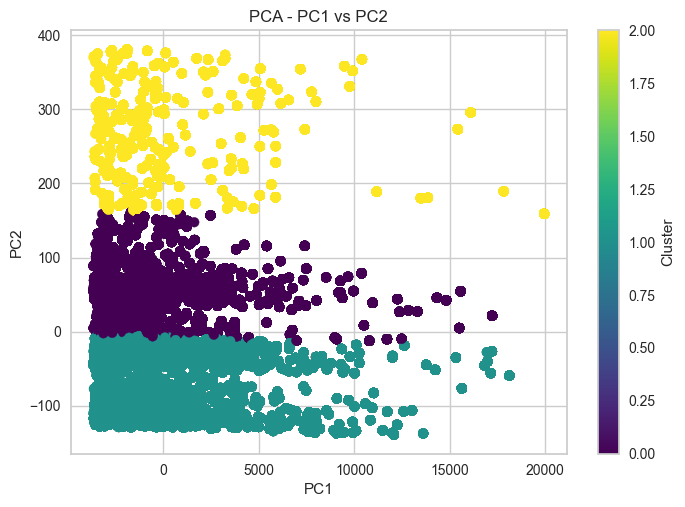

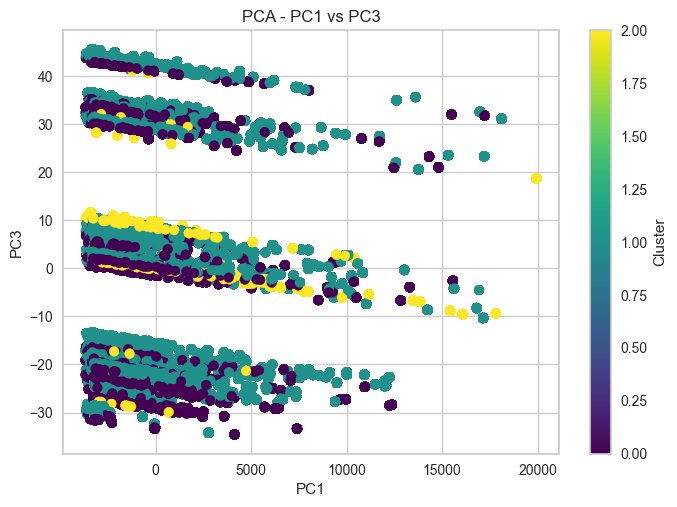

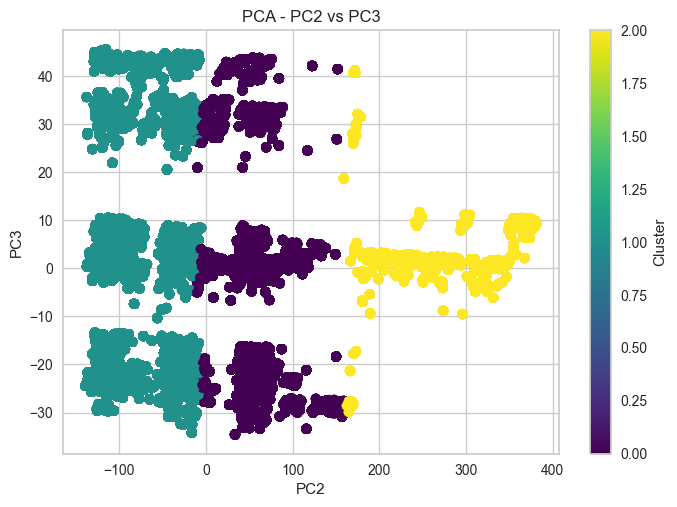

In [58]:
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA - PC1 vs PC2')
plt.colorbar(label='Cluster')
plt.show()

# Scatter plot of PC1 and PC3 with cluster color
plt.scatter(pca_df['PC1'], pca_df['PC3'], c=pca_df['Cluster'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC3')
plt.title('PCA - PC1 vs PC3')
plt.colorbar(label='Cluster')
plt.show()

# Scatter plot of PC2 and PC3 with cluster color
plt.scatter(pca_df['PC2'], pca_df['PC3'], c=pca_df['Cluster'], cmap='viridis')
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.title('PCA - PC2 vs PC3')
plt.colorbar(label='Cluster')
plt.show()


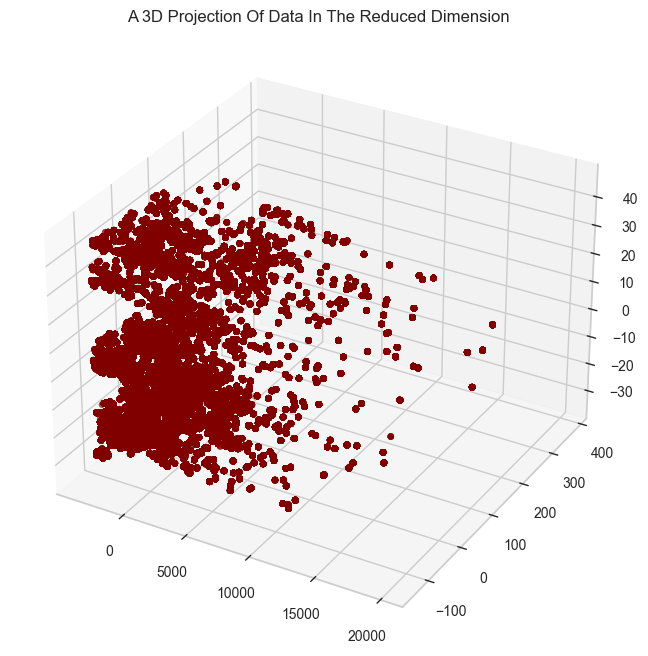

In [59]:
x = pca_df['PC1']
y = pca_df['PC2']
z = pca_df['PC3']

fig = plt.figure(figsize = (10,8))
ax = plt.subplot(111, projection = '3d')
ax.scatter(x,y,z, c= 'maroon', marker = 'o')
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

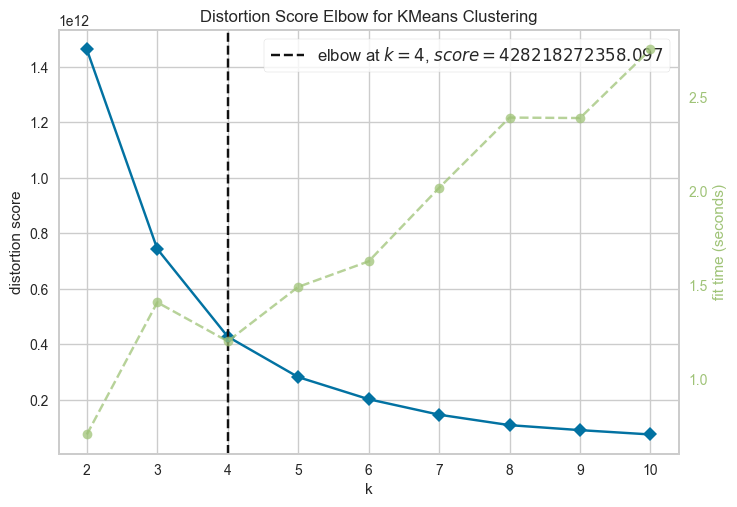

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [60]:

import warnings
warnings.filterwarnings(action = 'ignore')
elbow_m = KElbowVisualizer(KMeans(), k = 10)
elbow_m.fit(pca_df)
elbow_m.show()

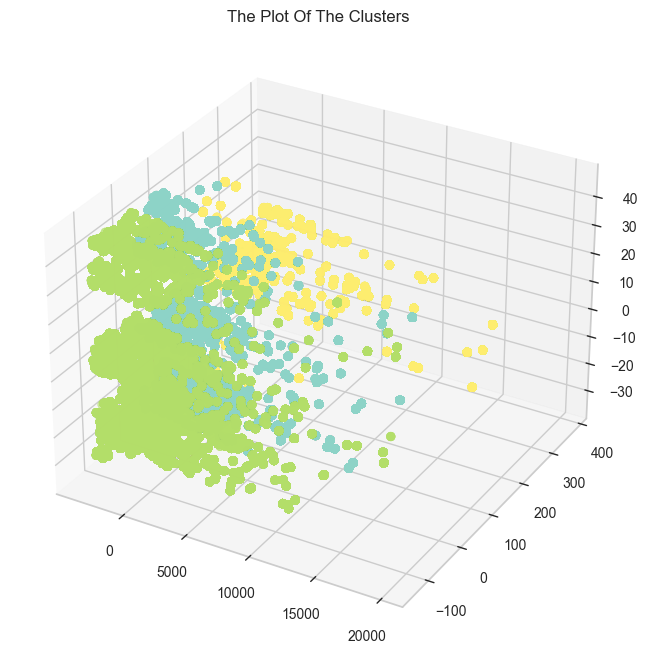

In [61]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c= pca_df["Cluster"], marker='o', cmap = 'Set3')
ax.set_title("The Plot Of The Clusters")
plt.show()

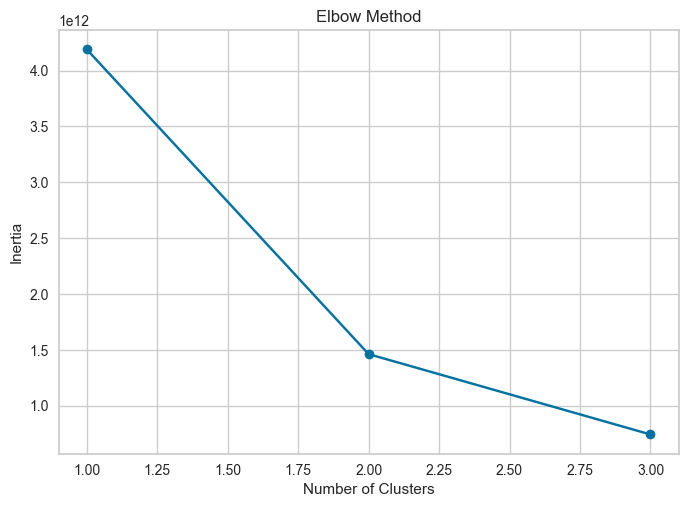

In [62]:
inertia = []

k_values = range(1,4)
for i in k_values:
    kmeans = KMeans(n_clusters= i, random_state= 42)
    kmeans.fit(subset_data)
    inertia.append(kmeans.inertia_)
    
plt.plot(range(1, 4), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [63]:
pca_df['Cluster'].value_counts()

Cluster
1    230053
0    115864
2     34913
Name: count, dtype: int64

In [64]:
#check for the centroids
cluster_info = pca_df.groupby('Cluster').mean()

print(cluster_info)


                PC1         PC2       PC3
Cluster                                  
0       -154.437986   52.754469 -0.423713
1         -1.754900  -67.064939 -0.181082
2        524.089104  266.838906  2.599360


In [65]:
#indentify which column belongs to which clsuter
cluster_center = kmeans.cluster_centers_
cluster_info = pd.DataFrame(cluster_center, columns = pca_cols)

cluster_info['Cluster'] = range(1,len(cluster_info) + 1)
for i in cluster_info['Cluster']:
    print(f"Columns for Cluster {i}:")
    cols = cluster_info.loc[cluster_info['Cluster'] == i].drop('Cluster', axis = 1).columns
    print(cols)
    print()
        

Columns for Cluster 1:
Index(['FACILITYID', 'UNITNUMBER', 'UNITCLASS', 'RESIDENTID', 'SHORTTERMSTAY',
       'ONHOLD', 'ONHOLDREASON', 'ROOMBOARDRATE', 'SERVICELEVELRATE',
       'MEDADMINRATE', 'ROOMBOARDMARKETRATE', 'SERVICELEVELMARKETRATE',
       'MEDADMINMARKETRATE'],
      dtype='object')

Columns for Cluster 2:
Index(['FACILITYID', 'UNITNUMBER', 'UNITCLASS', 'RESIDENTID', 'SHORTTERMSTAY',
       'ONHOLD', 'ONHOLDREASON', 'ROOMBOARDRATE', 'SERVICELEVELRATE',
       'MEDADMINRATE', 'ROOMBOARDMARKETRATE', 'SERVICELEVELMARKETRATE',
       'MEDADMINMARKETRATE'],
      dtype='object')

Columns for Cluster 3:
Index(['FACILITYID', 'UNITNUMBER', 'UNITCLASS', 'RESIDENTID', 'SHORTTERMSTAY',
       'ONHOLD', 'ONHOLDREASON', 'ROOMBOARDRATE', 'SERVICELEVELRATE',
       'MEDADMINRATE', 'ROOMBOARDMARKETRATE', 'SERVICELEVELMARKETRATE',
       'MEDADMINMARKETRATE'],
      dtype='object')



In [66]:
cluster_center

array([[ 4.44619166e+01,  1.30794211e+02,  9.96672995e-01,
         2.22670533e+04,  1.12864544e-02,  4.58656740e-02,
         9.69889112e-01, -8.97835230e-03, -8.01178964e-03,
        -9.15494331e-03,  1.50372337e-01, -3.30575409e-02,
        -4.52585250e-03],
       [ 4.09953047e+01,  1.29599972e+02,  1.01054552e+00,
         1.79003096e+04,  6.36832675e-04,  3.85661550e-02,
         9.71979362e-01, -4.65739287e-03, -2.05724182e-02,
         1.22578320e-02, -3.10875090e-01,  3.80687061e-02,
        -2.93413304e-03],
       [ 3.78691407e+01,  1.34281146e+02,  1.08448319e+00,
         1.05575988e+04, -1.92554306e-16,  3.62141968e-02,
         9.74694894e-01,  1.41403033e-01,  2.01941976e-01,
         6.56978129e-02, -5.73591198e-01,  2.65808761e-01,
         7.39854285e-02]])

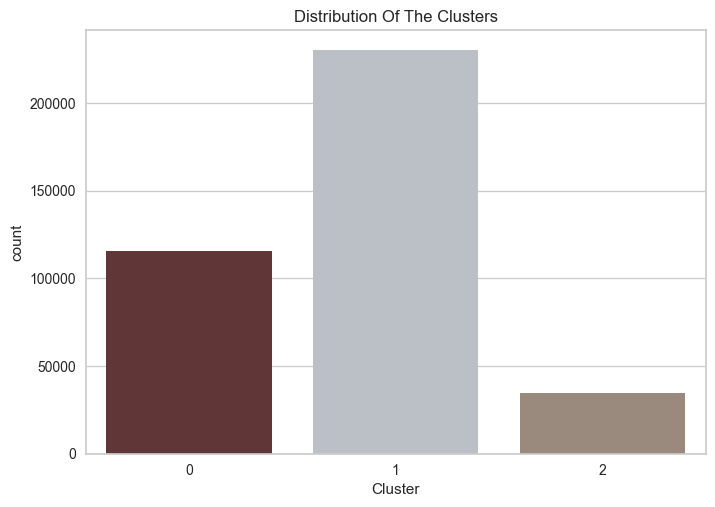

In [67]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x= pca_df["Cluster"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

In [68]:
pca_cols

['FACILITYID',
 'UNITNUMBER',
 'UNITCLASS',
 'RESIDENTID',
 'SHORTTERMSTAY',
 'ONHOLD',
 'ONHOLDREASON',
 'ROOMBOARDRATE',
 'SERVICELEVELRATE',
 'MEDADMINRATE',
 'ROOMBOARDMARKETRATE',
 'SERVICELEVELMARKETRATE',
 'MEDADMINMARKETRATE']

In [69]:
pca_df

,PC1,PC2,PC3,Cluster
0,-1279.566836,-46.913353,-26.450903,1
1,-2252.565538,-45.095958,-25.891128,1
2,-2607.563667,-42.799109,-25.708406,1
3,835.435358,-44.684950,-27.738237,1
4,-1156.562729,-42.016698,-26.583349,1
...,...,...,...,...
380825,5409.575795,115.592567,-21.204502,0
380826,31.603573,150.097190,-18.367174,0
380827,-1365.379889,170.265996,-17.744483,2
380828,4734.617713,166.157183,-21.355234,2


In [70]:
df_unit.isna().sum()

RENTROLLDATE              0
FACILITYID                0
UNITNUMBER                0
UNITCLASS                 0
RESIDENTID                0
SHORTTERMSTAY             0
ONHOLD                    0
ONHOLDREASON              0
ROOMBOARDRATE             0
SERVICELEVELRATE          0
MEDADMINRATE              0
ROOMBOARDMARKETRATE       0
SERVICELEVELMARKETRATE    0
MEDADMINMARKETRATE        0
OCCUPANCYTYPE             0
UNITCOMBINED              0
dtype: int64

In [71]:
pca_df.reset_index(drop=True, inplace=True)
df_unit.reset_index(drop=True, inplace=True)
df_unit['Cluster'] = pca_df['Cluster']


In [72]:
df.reset_index(drop=True, inplace=True)
df_unit.reset_index(drop=True, inplace=True)
df_unit['PAYOR'] = df['PAYOR']


In [73]:
df_unit

,RENTROLLDATE,FACILITYID,UNITNUMBER,UNITCLASS,RESIDENTID,SHORTTERMSTAY,ONHOLD,ONHOLDREASON,ROOMBOARDRATE,SERVICELEVELRATE,MEDADMINRATE,ROOMBOARDMARKETRATE,SERVICELEVELMARKETRATE,MEDADMINMARKETRATE,OCCUPANCYTYPE,UNITCOMBINED,Cluster,PAYOR
0,2023-04-01,71,83,2,21867.0,0,0,1,-0.238600,-0.254190,-0.237322,-0.172222,1.416542,1.205916,1,0_0_0,1,Private
1,2023-04-01,71,84,2,22840.0,0,0,1,-0.145876,-0.099849,0.032482,-0.172222,-0.324265,0.754819,1,0_0_0,1,Private
2,2023-04-01,71,86,1,23195.0,0,0,1,-0.227818,-0.254190,-0.237322,-0.441739,0.090213,0.754819,1,0_0_0,1,Private
3,2023-04-01,71,87,1,19752.0,0,0,1,-0.217755,-0.041971,0.080908,-0.441739,0.090213,1.205916,1,0_0_0,1,Private
4,2023-04-01,71,88,1,21744.0,0,0,1,-0.219912,-0.254190,-0.237322,-0.441739,1.609965,0.754819,1,0_0_0,1,Private
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380825,2023-03-22,60,251,1,15178.0,0,0,1,-0.303291,-0.254190,-0.237322,0.851943,0.753378,-0.147376,1,1_1_0,0,NaN
380826,2023-03-22,60,281,1,20556.0,0,0,1,-0.131500,0.012048,-0.237322,0.851943,0.477059,-0.147376,1,1_1_0,0,Private
380827,2023-03-22,60,300,2,21953.0,0,0,1,-0.150908,0.012048,-0.015944,1.110679,0.753378,0.303722,1,1_1_0,2,Private
380828,2023-03-22,60,301,1,15853.0,0,0,1,-0.168159,0.012048,-0.237322,0.851943,0.477059,-1.758437,1,1_1_0,2,Private


In [74]:
cluster_facility = df_unit.groupby('Cluster')['FACILITYID'].unique()
print(cluster_facility)


Cluster
0    [71, 10, 41, 13, 36, 1, 44, 69, 38, 68, 11, 2,...
1    [71, 10, 45, 41, 13, 36, 63, 1, 44, 37, 69, 38...
2                      [71, 1, 40, 38, 11, 31, 15, 60]
Name: FACILITYID, dtype: object


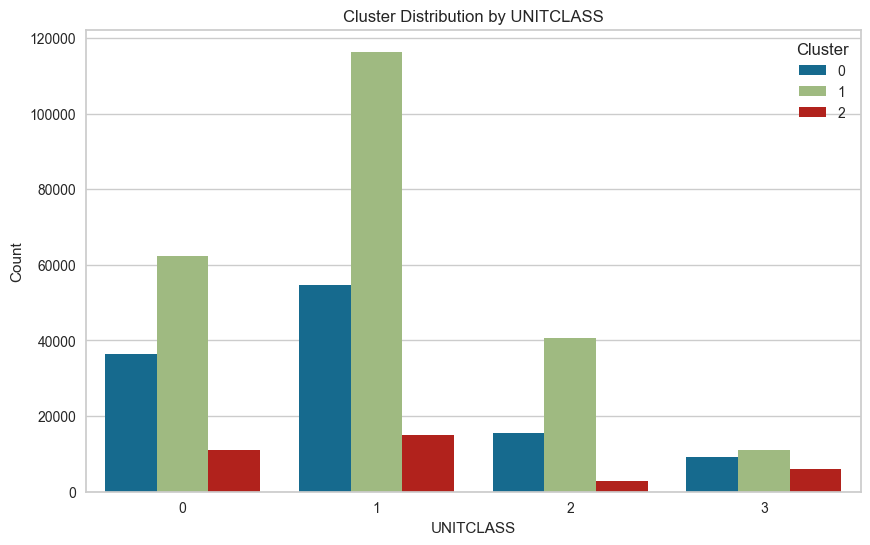

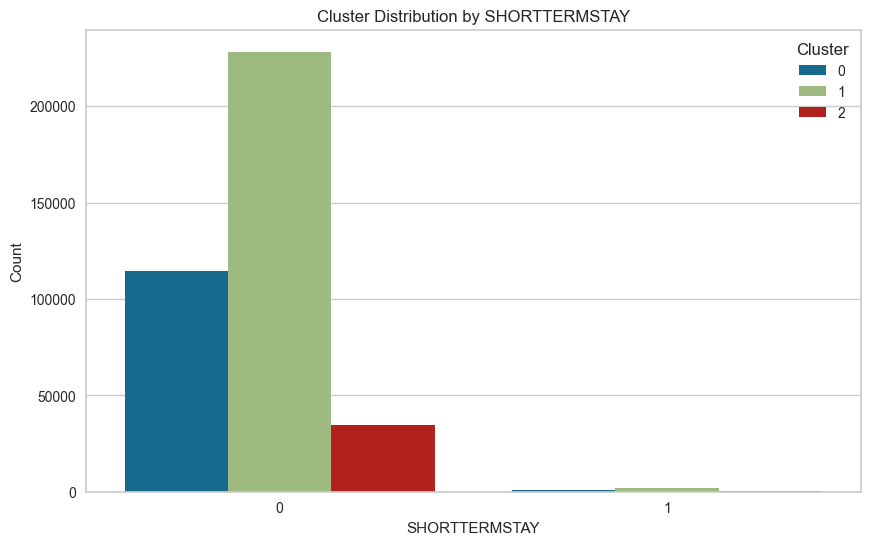

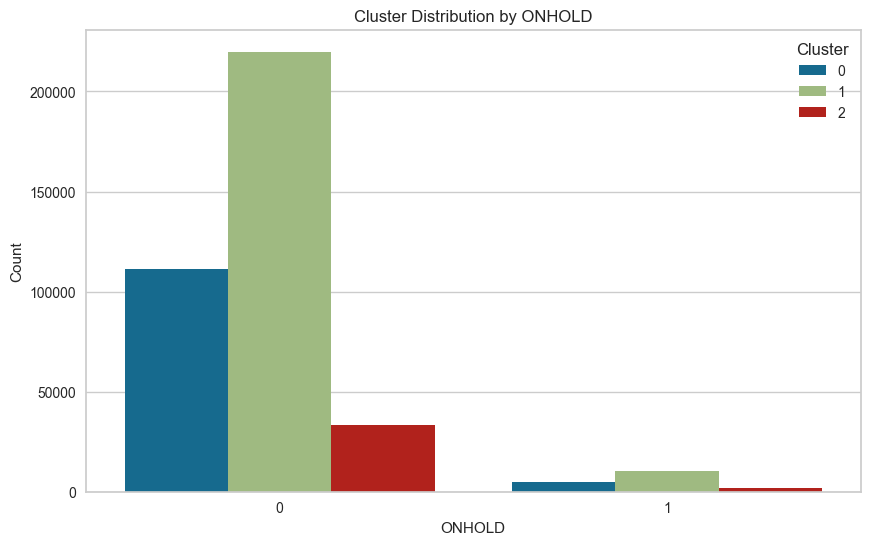

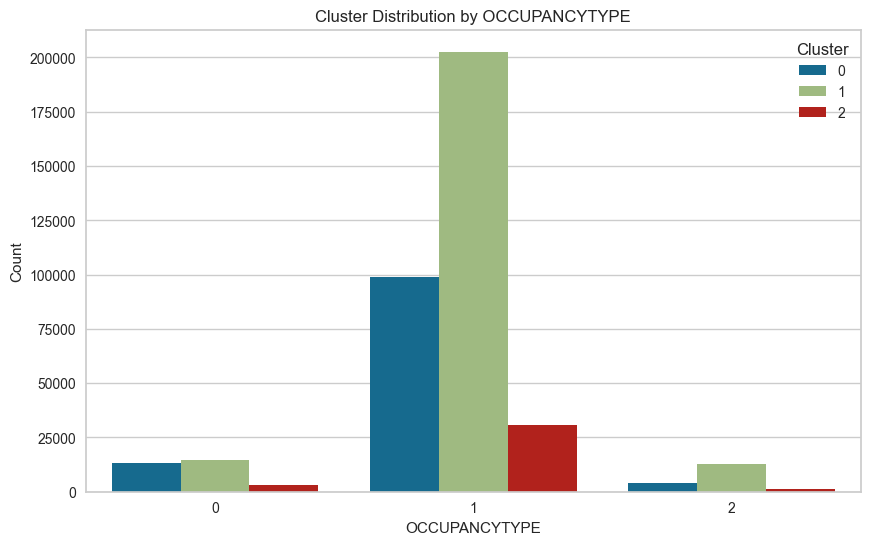

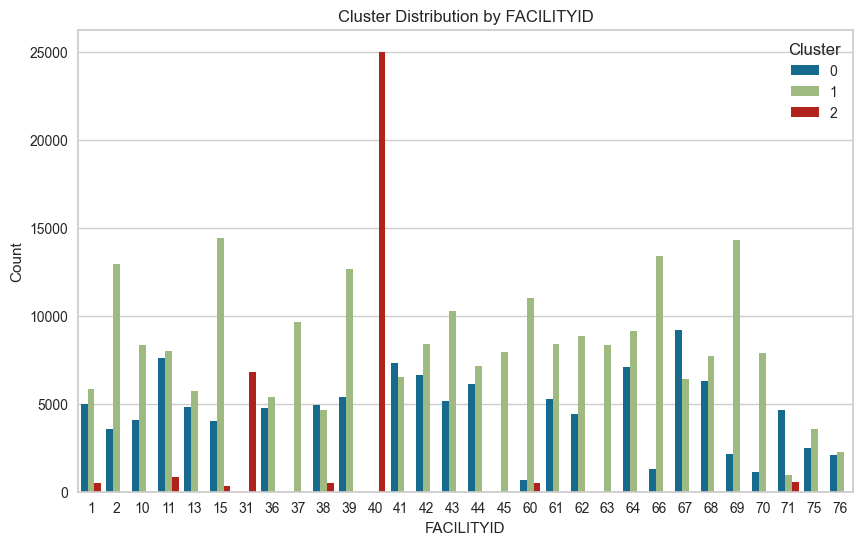

In [75]:
categorical_cols = ['UNITCLASS', 'SHORTTERMSTAY', 'ONHOLD','OCCUPANCYTYPE', 'FACILITYID']

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='Cluster', data= df_unit)
    plt.title(f'Cluster Distribution by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Cluster')
    plt.show()

<Figure size 1000x600 with 0 Axes>

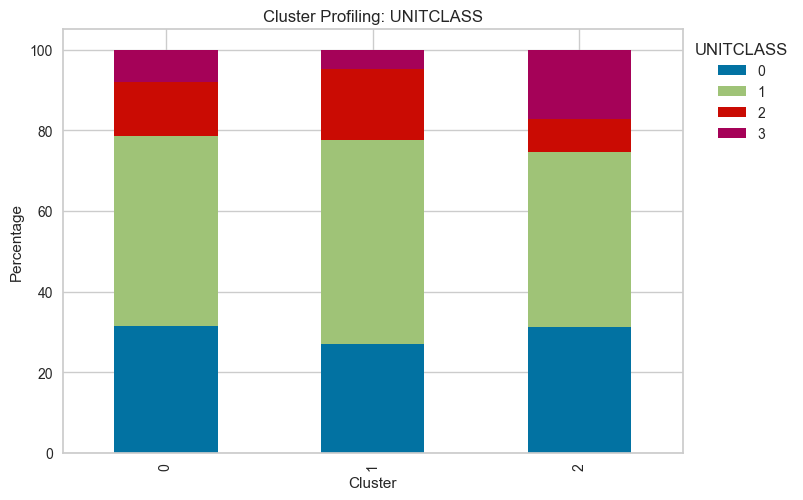

<Figure size 1000x600 with 0 Axes>

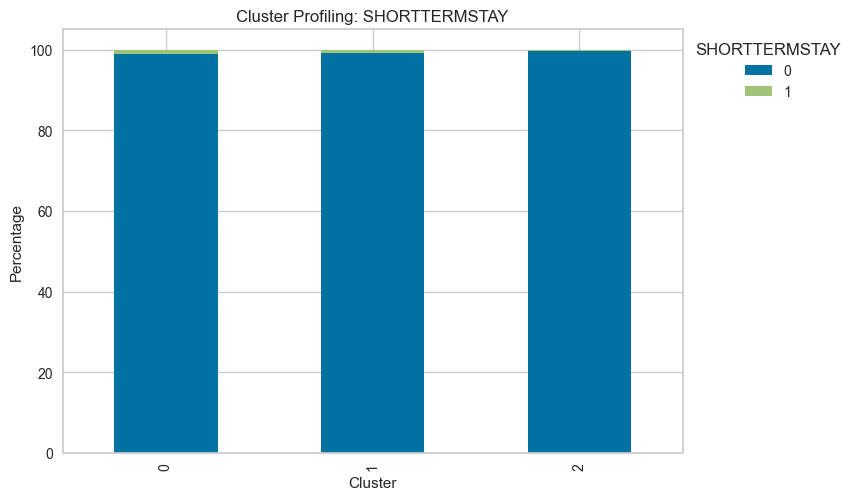

<Figure size 1000x600 with 0 Axes>

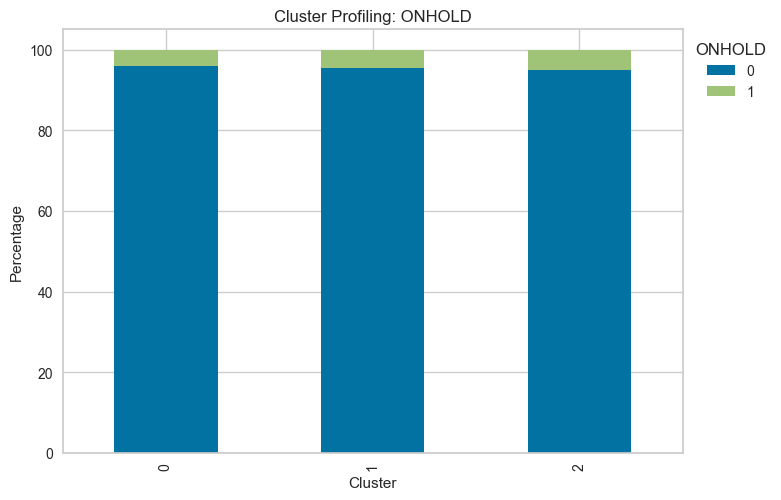

<Figure size 1000x600 with 0 Axes>

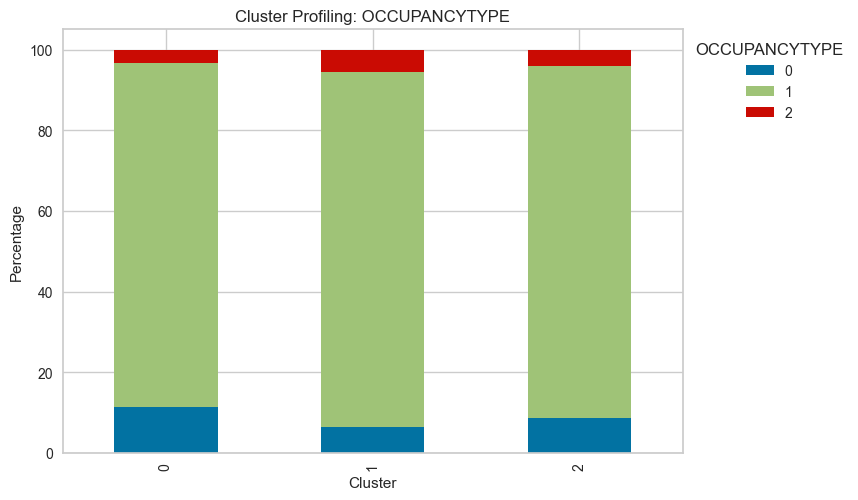

<Figure size 1000x600 with 0 Axes>

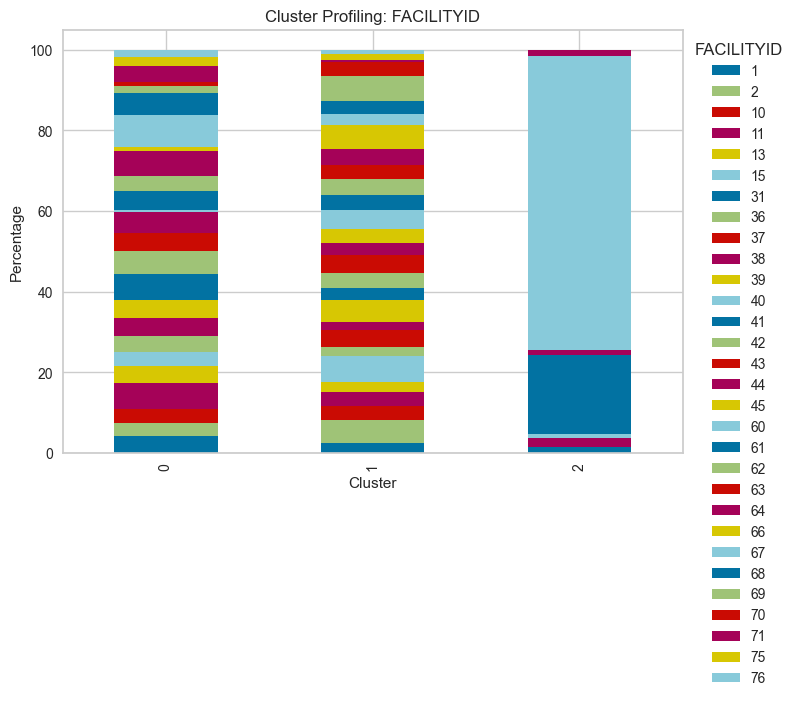

In [76]:
# Loop through each categorical column
for col in categorical_cols:
    cluster_profile = df_unit.groupby('Cluster')[col].value_counts(normalize=True).mul(100).unstack()
    plt.figure(figsize=(10, 6))
    cluster_profile.plot(kind='bar', stacked=True)
    plt.title(f'Cluster Profiling: {col}')
    plt.xlabel('Cluster')
    plt.ylabel('Percentage')
    plt.legend(title=col, bbox_to_anchor=(1, 1))
    plt.show()


In [77]:
import plotly.express as px

payor_percentage = df_unit.groupby(['Cluster', 'PAYOR']).size().unstack().div(df_unit.groupby('Cluster').size(), axis=0).mul(100)

payor_percentage = payor_percentage.reset_index()

payor_percentage_melted = payor_percentage.melt(id_vars='Cluster', var_name='PAYOR', value_name='Percentage')

fig = px.bar(payor_percentage_melted, x='Cluster', y='Percentage', color='PAYOR', barmode='group', title="Percentage of 'PAYOR' in each cluster")
fig.show()


In [78]:
print(payor_percentage)

PAYOR  Cluster  Medicaid       PAL    Private
0            0  9.796831  0.088897  67.542118
1            1  9.836429  0.075635  67.732218
2            2  9.515080  0.074471  67.287257


# Insights

# Cluster 0- 
Contains values(resident id) more than 100000+ <br><br>
Having Maximum percentage of UNITCLASS 'Studio (0)' <br><br>
Contains the count of maximum RESIDENTID with shorttermstay <br><br>
Most Profitable Cluster <br><br>


# Cluster 1- 
Biggest Cluster with more than 200000+ values.  <br><br>
Maximum percentage of UNITCLASS 'Single BedRoom (1)' <br><br> 
Maximum RESDIENTID with PAYOR type = 'PRIVATE', 'MEDICAD'<br><br>
Containing highest percentage of OCCUPANCYTYPE('SEMIPRIAVTE','COUPLE')<br><br>
           

# Cluster 2- 
Smallest Cluster among all with values than 50k <br><br>
Contains minimum number of UNITCLASS.<br><br>
Least percentage of shortterm stay<br><br>
Least Occupancytypes<br><br>
Contains maximum number of facility id<br><br>